# Plotting Feldspar Compositions from Rhyolite-MELTS

In [11]:
import ternary
import numpy as np
import Thermobar as pt
from scipy import interpolate

from pyrolite.plot import pyroplot

# import plotly.io as pio
# pio.renderers.default = 'notebook_connected'
import plotly.express as px
import plotly



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import PathCollection
import glob
import os
from PIL import Image

from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "last"
from IPython import display

# Specify Sample Name and Population

In [12]:
sample = 'ORA-5B-407'
population = 'VCCR' # selects which excel sheet to get compositional data from

# Import Excel Files

## Get Data File Names

In [13]:
# Path to folder with Rhyolite-MELTS simulations
path =r'/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/'
filenames = glob.glob(path + sample + '/*.xlsm') #selects files for our chosen sample
filenames = sorted(filenames)
print(filenames)

['/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/ORA-5B-407/ORA-5B-407-AVG+0.0-MELTS_Auto.xlsm', '/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/ORA-5B-407/ORA-5B-407-AVG+0.5-MELTS_Auto.xlsm', '/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/ORA-5B-407/ORA-5B-407-AVG+1.0-MELTS_Auto.xlsm', '/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/ORA-5B-407/ORA-5B-407-AVG+1.5-MELTS_Auto.xlsm', '/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/ORA-5B-407/ORA-5B-407-AVG+2.0-MELTS_Auto.xlsm', '/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/ORA-5B-407/ORA-5B-407-AVG+2.5-MELTS_Auto.xlsm', '/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/ORA-5B-407/ORA-5B-407-AVG

## Loop through excel files and create master dataframe

In [14]:
# First create dataframes to store data
plagioclase_all = pd.DataFrame()
sanidine_all = pd.DataFrame()

In [15]:
# Then run loop to get all of the information from the excel files
for filename in filenames:
    print(filename)

    # read the file into a pandas dataframe and assign it to a variable
    temp = pd.read_excel(filename, sheet_name = ['plagioclase', 'sanidine'], usecols = ('Index', 'T (C) ', 'P (MPa)', 'sanidine', 'albite', 'anorthite'))

    # extract the last folder name in pathname
    basename = os.path.basename(filename)
    basename

    # simulation name in format "0.5" for dataframe slicing later on
    basename = basename.replace(sample + '-AVG+', '')
    basename = basename.replace('-MELTS_Auto.xlsm', '')
    print(basename)

    # create seperate dataframe for each mineral phase
    plagioclase = temp['plagioclase']
    sanidine = temp['sanidine']

    # read in simulation name into a column for each of the dataframes 
    plagioclase['Simulation'] = float(basename)
    sanidine['Simulation'] = float(basename)

    # create a column which specifies the phase
    plagioclase['Phase'] = str('plagioclase')
    sanidine['Phase'] = str('sanidine')

    # append the data to an existing dataframe so it is not overwritten
    plagioclase_all = plagioclase_all.append(plagioclase)
    sanidine_all = sanidine_all.append(sanidine)

# create a master dataframe for all of the data 
all_phases = pd.DataFrame()

# append all dataframes to master dataframe
dataframes = [plagioclase_all, sanidine_all] # list of all dataframes
for i in dataframes:
    all_phases = all_phases.append(i)

/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/ORA-5B-407/ORA-5B-407-AVG+0.0-MELTS_Auto.xlsm
0.0
/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/ORA-5B-407/ORA-5B-407-AVG+0.5-MELTS_Auto.xlsm
0.5
/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/ORA-5B-407/ORA-5B-407-AVG+1.0-MELTS_Auto.xlsm
1.0
/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/ORA-5B-407/ORA-5B-407-AVG+1.5-MELTS_Auto.xlsm
1.5
/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/ORA-5B-407/ORA-5B-407-AVG+2.0-MELTS_Auto.xlsm
2.0
/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/ORA-5B-407/ORA-5B-407-AVG+2.5-MELTS_Auto.xlsm
2.5
/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/ORA-5B-407/ORA-5B-407

In [16]:
print(plagioclase_all)

     Index  T (C)   P (MPa)    albite  anorthite  sanidine  Simulation  \
0     56.0   721.0    400.0  0.791035   0.134188  0.074777         0.0   
1     57.0   720.0    400.0  0.792387   0.127692  0.079921         0.0   
2     58.0   719.0    400.0  0.793084   0.121149  0.085767         0.0   
3     59.0   718.0    400.0  0.792960   0.114528  0.092512         0.0   
4     60.0   717.0    400.0  0.791768   0.107779  0.100452         0.0   
..     ...     ...      ...       ...        ...       ...         ...   
203  728.0   823.0     25.0  0.526479   0.421459  0.052061         4.5   
204  729.0   822.0     25.0  0.525958   0.422285  0.051757         4.5   
205  730.0   821.0     25.0  0.525523   0.423009  0.051468         4.5   
206  731.0   820.0     25.0  0.525165   0.423642  0.051193         4.5   
207  732.0   819.0     25.0  0.524876   0.424194  0.050930         4.5   

           Phase  
0    plagioclase  
1    plagioclase  
2    plagioclase  
3    plagioclase  
4    plagioclase

In [17]:
    # import ternary
    
    # scale = 40
    # figure, tax = ternary.figure(scale=scale)
    # figure.set_size_inches(10, 10)

    # # Draw Boundary and Gridlines
    # tax.boundary(linewidth=2.0)
    # tax.gridlines(color="blue", multiple=5)
    
    # # Set Axis labels and Title
    # fontsize = 12
    # offset = 0.14
    # tax.set_title("Feldspar Compositions\n", fontsize=fontsize)
    # tax.right_corner_label("An", fontsize=fontsize)
    # tax.top_corner_label("Or", fontsize=fontsize)
    # tax.left_corner_label("Ab", fontsize=fontsize)
    # tax.left_axis_label("Alkali Feldspar", fontsize=fontsize, offset=offset)
    # tax.right_axis_label("", fontsize=fontsize, offset=offset)
    # tax.bottom_axis_label("Plagioclase", fontsize=fontsize, offset=offset)
    
    # tax.ticks(axis='lbr', multiple=5, linewidth=1, offset=0.025)
    # tax.get_axes().axis('off')
    # tax.clear_matplotlib_ticks()
    # tax.show()


In [18]:
#fig, tax = pt.plot_fspar_classification()
#fig.tight_layout()

In [19]:
#Pyroplot example

#fig, ax = pyroplot.scatter()

# ax = plagioclase_all.loc[:,['sanidine', 'albite', 'anorthite']].pyroplot.scatter(c = 'k')
# ax = sanidine_all.loc[:,['sanidine', 'albite', 'anorthite']].pyroplot.scatter(c = 'b')
# plt.show()

In [20]:
#Discrete colors:
#all_phases["P (MPa)"] = all_phases["P (MPa)"].astype(str)


fig = px.scatter_ternary(all_phases, a = 'sanidine', b = 'albite', c = 'anorthite', color = 'P (MPa)', symbol = 'Phase')
fig.show()
plotly.offline.iplot(fig)


In [21]:
# all_phases.reset_index
# Simulations = all_phases['Simulation'].unique()
# Simulations = Simulations.tolist()
# Simulations

# print(Simulations)

In [22]:
all_phases.reset_index
Simulations = all_phases['Simulation'].unique()
Simulations = Simulations.tolist()

#string will make it discrete colors!

#all_phases["P (MPa)"] = all_phases["P (MPa)"].astype(str)

for i in Simulations:
    #all_phases = all_phases.set_index('Simulation')

    # Dataframe Slicing of average values using "isin"
    #df = all_phases.loc[[i]]
    #df = all_phases['Simulation'].loc(i)

    df = all_phases[all_phases['Simulation'].isin([i])]

# discrete colors
    #fig = px.scatter_ternary(df, a = 'sanidine', b = 'albite', c = 'anorthite', color = 'P (MPa)', symbol = 'P (MPa)')
    
    fig = px.scatter_ternary(df, a = 'sanidine', b = 'albite', c = 'anorthite', color = 'P (MPa)', symbol = 'Phase', title = "+ " + str(i) + " K2O")
    fig.update_layout(legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.3),title = dict(yanchor="top",y=0.95,xanchor="left",x=0.45))

    fig.show()
    plotly.offline.iplot(fig)



#Need to plot up a ternary with each Pressure in a certain color

#fig = px.scatter_ternary(all_phases, a = 'sanidine', b = 'albite', c = 'anorthite', color = 'P (MPa)', symbol = 'Phase')


[400.0, 375.0, 350.0, 325.0, 300.0, 275.0, 250.0, 225.0, 200.0, 175.0, 150.0, 125.0, 100.0, 75.0, 50.0, 25.0, nan]


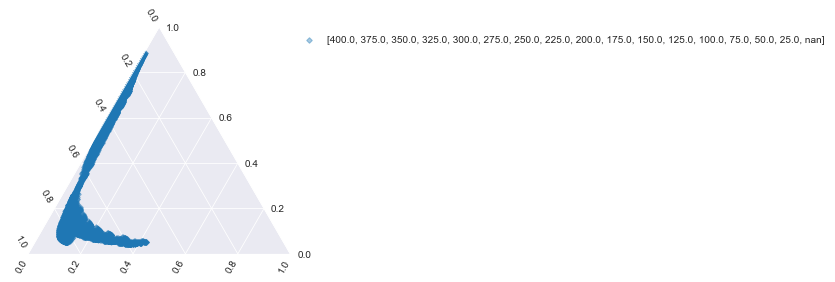

In [23]:
from mpltern.ternary.datasets import get_scatter_points
%matplotlib inline

t0, l0, r0 = get_scatter_points(100, seed=19)
t1, l1, r1 = get_scatter_points(100, seed=68)

dt = t1 - t0
dl = l1 - l0
dr = r1 - r0

length = np.sqrt(dt ** 2 + dl ** 2 + dr ** 2)

fig = plt.figure(figsize=(10.8, 4.8))
fig.subplots_adjust(left=0.075, right=0.85, wspace=0.3)

sns.set_style('darkgrid')
ax = fig.add_subplot(121, projection='ternary')

all_phases.reset_index
pressures = all_phases['P (MPa)'].unique()
pressures = pressures.tolist()
print (pressures)

for i in pressures:
    fig = ax.scatter(all_phases['sanidine'], all_phases['albite'], all_phases['anorthite'], alpha = 0.4, label = pressures)    
    ax.legend() 
    plt.show()

#= all_phases['Phase'], hue = all_phases['P (MPa)'])
